<a href="https://colab.research.google.com/github/Ayush-Tibrewal/CongnitiveLoad-Detection/blob/main/DWT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from PyEMD import EMD
import pandas as pd
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Read the CSV file
raw_data = pd.read_csv("/content/Relax_sub_1.csv")
raw_data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,31
0,0,-293.665598,-393.401573,-575.448727,-552.385245,-343.861665,-240.575451,-212.163418,-238.633139,-120.328131,...,-349.634937,-292.825391,-287.392312,-280.841417,-286.448680,-260.862152,-266.688030,-223.701399,-348.595826,-950.235710
1,1,-298.399875,-400.048753,-585.573202,-562.898707,-351.568356,-243.086700,-213.693102,-240.429100,-124.218438,...,-356.882097,-302.149321,-303.996441,-304.624400,-309.582008,-274.418955,-276.067366,-240.164287,-377.595147,-981.268160
2,2,-301.943789,-407.845605,-595.233775,-567.927282,-349.943338,-240.779735,-215.572546,-237.671039,-117.170749,...,-355.676249,-302.652226,-312.870072,-319.762199,-321.523901,-279.077326,-280.387428,-253.346596,-398.324640,-1005.492402
3,3,-285.972535,-377.387265,-573.882757,-554.185721,-338.059141,-222.110522,-200.207311,-227.684893,-104.904568,...,-339.951335,-283.877219,-287.424846,-286.742556,-291.693446,-255.920049,-259.248795,-229.922294,-371.022823,-972.021234
4,4,-257.707257,-344.456374,-551.952952,-539.960243,-321.224793,-198.088066,-177.041076,-215.366742,-88.303354,...,-319.689945,-261.388478,-259.092244,-252.789884,-264.366548,-231.102638,-232.788673,-203.769612,-354.462897,-942.052626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,3195,28.360458,-183.489419,-265.421269,-198.771157,16.740575,-18.570868,-24.165514,-22.741301,-14.963405,...,-6.008068,-9.371282,-3.708185,-9.267172,-10.835656,-11.617439,-11.273956,42.182920,-70.737582,-756.125845
9596,3196,35.072603,-181.578718,-262.623580,-195.849834,22.022560,-13.970802,-19.955064,-21.679308,-5.404882,...,-0.586236,-3.404504,1.843083,-4.105553,-4.355106,-7.053602,-7.925363,46.649043,-63.596997,-749.580617
9597,3197,31.502608,-182.626678,-260.516650,-193.048534,19.556098,-15.391293,-18.705570,-17.705541,1.026325,...,-7.509123,-4.323253,2.909767,-1.627734,-5.492465,-12.447735,-14.474977,44.143314,-60.869401,-745.142406
9598,3198,25.638116,-185.239789,-264.003300,-195.709773,16.213861,-18.464385,-20.589722,-19.532143,-9.206217,...,-14.937393,-14.550446,-7.822329,-9.296084,-13.332598,-18.202408,-18.954172,41.288802,-65.082642,-746.914931


In [ ]:
! pip install scaleogram

In [ ]:
pip install mne

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
import mne

In [ ]:
def arithmatic_features(window):
    features = []
    features.append(np.mean(window))
    features.append(np.var(window))
    features.append(np.std(window))
    features.append(np.min(window))
    features.append(np.max(window))
    features.append(features[4] - features[3])
    features.append(np.median(window))
    data = window
    var = np.var(data)
    features.append(var)
    data_1 = np.diff(data)
    data_2 = np.diff(data_1)
    hj_mb = np.sqrt(np.var(data_1) / var)
    hj_comp = (np.sqrt(np.var(data_2) / np.var(data_1))) / hj_mb
    features.append(hj_mb)
    features.append(hj_comp)
    #entropy bhi add krna hai.
    return features

NON OVERLAPPING

In [ ]:

# Assuming you have num_samples and sfreq defined
sfreq = 128
num_samples = raw_data.shape[0]
#duration = raw_data.shape[0] / raw_data.info["sfreq"]
window_size = int(sfreq)  # Set the window size to the calculated sampling frequency (1 second)

result = []
for i in range(32):
    raw = raw_data.iloc[:, i]
    x_np = raw.values
    data = x_np.astype(float)

    # Apply sliding window without overlapping
    num_windows = int(len(data) / window_size)
    for j in range(num_windows):
        start = j * window_size
        end = start + window_size
        window_data = data[start:end]

        # Perform DWT decomposition on the windowed data
        coef = pywt.wavedec(window_data, 'db4', level=4)
        cA4, cD4, cD3, cD2, cD1 = coef

        # Extract the desired number of coefficients
        coefficients = [cA4, cD4, cD3, cD2, cD1]

        # Assuming you have a function arithmatic_features(coeff) that extracts features
        for coeff in coefficients:
            coeff_features = arithmatic_features(coeff)

            # Append the "target" label to the features
            window_start = start  # Start of the current window
            target = raw_data['target'].iloc[window_start]  # Assuming "target" is in the original raw_data DataFrame
            coeff_features.append(target)

            result.append(coeff_features)
            print("Coefficient Features:", coeff_features)

# Convert the result to a DataFrame
df = pd.DataFrame(result)

# Save the DataFrame as a CSV file
df.to_csv("/content/drive/MyDrive/DWT3_NonOverlaping_RA2.csv", index=False)


OVERLAPPING

In [ ]:
import pandas as pd
import pywt

# Assuming you have num_samples and sfreq defined
sfreq = 128
num_samples = raw_data.shape[0]
window_size = int(sfreq)  # Set the window size to the calculated sampling frequency (1 second)
step_size = int(sfreq / 2)  # Set the step size for overlapping windows (e.g., 50% overlap)

result = []
for i in range(32):
    raw = raw_data.iloc[:, i]
    x_np = raw.values
    data = x_np.astype(float)

    # Apply sliding window with overlapping
    start = 0
    while start + window_size <= len(data):
        end = start + window_size
        window_data = data[start:end]

        # Perform DWT decomposition on the windowed data
        coef = pywt.wavedec(window_data, 'db4', level=4)
        cA4, cD4, cD3, cD2, cD1 = coef

        # Extract the desired number of coefficients
        coefficients = [cA4, cD4, cD3, cD2, cD1]

        # Assuming you have a function arithmatic_features(coeff) that extracts features
        for coeff in coefficients:
            coeff_features = arithmatic_features(coeff)

            # Append the "target" label to the features
            window_middle = (start + end) // 2  # Middle of the current window
            target = raw_data['target'].iloc[window_middle]  # Assuming "target" is in the original raw_data DataFrame
            coeff_features.append(target)

            result.append(coeff_features)
            print("Coefficient Features:", coeff_features)

        start += step_size

# Convert the result to a DataFrame
df = pd.DataFrame(result)

# Save the DataFrame as a CSV file
df.to_csv("/content/drive/MyDrive/DWT3_Overlapping_RA2.csv", index=False)


Coefficient Features: [179.28359083331222, 32997.01035664621, 181.65079233696233, 4.7510156792468194, 509.02767719657066, 504.2766615173239, 116.32359280659506, 32997.01035664621, 0.16264026166085196, 3.5011294896565173, 1]
Coefficient Features: [-0.16300231308176835, 5.780436908556298, 2.4042539193180694, -4.593971764453115, 4.795687345274366, 9.38965910972748, -0.03742591348903992, 5.780436908556298, 1.7284314463464108, 1.0406425589455863, 1]
Coefficient Features: [0.22954479188469207, 1.7800569389621685, 1.3341877450202309, -2.5227473639513316, 5.229659957759707, 7.752407321711038, 4.218847493575595e-15, 1.7800569389621685, 1.5957828594563859, 1.1607381737748927, 1]
Coefficient Features: [-0.024348018360336537, 0.1109292442221601, 0.3330604212784222, -1.134377422740575, 0.9959242147851088, 2.130301637525684, 1.1934897514720433e-15, 0.1109292442221601, 1.7320019215222113, 1.074088468230879, 1]
Coefficient Features: [7.243376711033904e-16, 0.0001917339935180376, 0.013846804451498461, 

KeyboardInterrupt: ignored

ALL THE COEFFICINT EXTRACTION

In [ ]:
import pandas as pd
import numpy as np
import pywt
import glob
import os

# Define the input and output folders
input_folder = '/content/drive/MyDrive/try1'
output_folder = '/content/drive/MyDrive/wewill2'

# Define the wavelet and level of decomposition
wavelet = 'db4'
level = 4

# Get the list of CSV files in the input folder
csv_files = glob.glob(os.path.join(input_folder, '*.csv'))

# Process each CSV file
for csv_file in csv_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Initialize an empty DataFrame to store the coefficients
    coefficients_df = pd.DataFrame()

    # Filter the columns to include only those with EEG data (excluding 'target' column)
    eeg_columns = [col for col in df.columns if col != 'target']

    # Iterate over each channel of the EEG signal
    for column in eeg_columns:
        channel_data = df[column].values  # Get the channel data as a NumPy array

        # Adjust the length of the channel data to be divisible by the level of decomposition
        channel_len = len(channel_data)
        channel_len_adjusted = channel_len - (channel_len % (2 ** level))
        channel_data = channel_data[:channel_len_adjusted]

        # Apply the DWT to the channel
        coeffs = pywt.wavedec(channel_data, wavelet, level=level)

        # Extract the five coefficients: cA5, cD5, cD4, cD3, cD2
        cA5, cD5, cD4, cD3, cD2 = coeffs

        # Create a DataFrame to store the coefficients
        channel_coeffs_df = pd.DataFrame({
            'cA5': cA5,
            'cD5': cD5,
            'cD4': cD4[:len(cD5)],  # Adjust the length of cD4 to match cD5
            'cD3': cD3[:len(cD5)],  # Adjust the length of cD3 to match cD5
            'cD2': cD2[:len(cD5)]   # Adjust the length of cD2 to match cD5
        })

        # Append the channel coefficients to the main DataFrame
        coefficients_df = pd.concat([coefficients_df, channel_coeffs_df], axis=1)

    # Get the base name of the input file
    base_name = os.path.basename(csv_file)

    # Read the target label column from the original DataFrame and add it to coefficients_df
    target_label = df['target']
    coefficients_df['target'] = target_label

    # Save the coefficients DataFrame to a CSV file with the same name
    output_file = os.path.join(output_folder, base_name)
    coefficients_df.to_csv(output_file, index=False)


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/wewill2/modified_sampled_data.csv")
data

NameError: ignored

In [ ]:
import pandas as pd
import numpy as np
import pywt
import glob
import os

# Define the input and output folders
input_folder = '/content/drive/MyDrive/try1'
output_folder = '/content/drive/MyDrive/wewill2'

# Define the wavelet and level of decomposition
wavelet = 'db4'
level = 4

# Get the list of CSV files in the input folder
csv_files = glob.glob(os.path.join(input_folder, '*.csv'))

# Process each CSV file
for csv_file in csv_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Initialize an empty DataFrame to store the coefficients
    coefficients_df = pd.DataFrame()

    # Filter the columns to include only those with EEG data (excluding 'target' column)
    eeg_columns = [col for col in df.columns if col != 'target']

    # Iterate over each channel of the EEG signal
    for column in eeg_columns:
        channel_data = df[column].values  # Get the channel data as a NumPy array

        # Adjust the length of the channel data to be divisible by the level of decomposition
        channel_len = len(channel_data)
        channel_len_adjusted = channel_len - (channel_len % (2 ** level))
        channel_data = channel_data[:channel_len_adjusted]

        # Apply the DWT to the channel
        coeffs = pywt.wavedec(channel_data, wavelet, level=level)

        # Extract the five coefficients: cA5, cD5, cD4, cD3, cD2
        cA5, cD5, cD4, cD3, cD2 = coeffs

        # Create a DataFrame to store the coefficients with column names including the channel name
        channel_coeffs_df = pd.DataFrame({
            f'{column}_cA5': cA5,
            f'{column}_cD5': cD5,
            f'{column}_cD4': cD4[:len(cD5)],  # Adjust the length of cD4 to match cD5
            f'{column}_cD3': cD3[:len(cD5)],  # Adjust the length of cD3 to match cD5
            f'{column}_cD2': cD2[:len(cD5)]   # Adjust the length of cD2 to match cD5
        })

        # Append the channel coefficients to the main DataFrame
        coefficients_df = pd.concat([coefficients_df, channel_coeffs_df], axis=1)

    # Get the base name of the input file
    base_name = os.path.basename(csv_file)

    # Read the target label column from the original DataFrame and add it to coefficients_df
    target_label = df['target']
    coefficients_df['target'] = target_label

    # Save the coefficients DataFrame to a CSV file with the same name
    output_file = os.path.join(output_folder, base_name)
    coefficients_df.to_csv(output_file, index=False)


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import os

# Define the input and output folders
input_folder = '/content/drive/MyDrive/wewill2'  # Update the input folder path
output_folder = '/content/drive/MyDrive/8_feactures'  # Update the output folder path

# Get the list of CSV files in the input folder
csv_files = glob.glob(os.path.join(input_folder, '*.csv'))

# Initialize an empty DataFrame to store the features
features_df = pd.DataFrame()

# Iterate over each channel's coefficients
for column in eeg_columns:
    for coefficient_suffix in ['cA5', 'cD5', 'cD4', 'cD3', 'cD2']:
        coefficient_column = f'{column}_{coefficient_suffix}'
        coefficient_values = coefficients_df[coefficient_column].values

        # Calculate the features for the coefficient
        mean_coefficient = np.mean(coefficient_values)
        std_coefficient = np.std(coefficient_values)
        skewness_coefficient = stats.skew(coefficient_values)
        kurtosis_coefficient = stats.kurtosis(coefficient_values)
        entropy_coefficient = stats.entropy(coefficient_values)
        energy_coefficient = np.sum(coefficient_values ** 2)

        # Create a DataFrame to store the features for this channel and coefficient
        channel_coefficient_features_df = pd.DataFrame({
            f'{column}_{coefficient_suffix}_mean': mean_coefficient,
            f'{column}_{coefficient_suffix}_std': std_coefficient,
            f'{column}_{coefficient_suffix}_skewness': skewness_coefficient,
            f'{column}_{coefficient_suffix}_kurtosis': kurtosis_coefficient,
            f'{column}_{coefficient_suffix}_entropy': entropy_coefficient,
            f'{column}_{coefficient_suffix}_energy': energy_coefficient
        })

        # Append the channel's coefficient features to the main DataFrame
        features_df = pd.concat([features_df, channel_coefficient_features_df], axis=1)

# Add the 'target' column to the features DataFrame
features_df['target'] = coefficients_df['target']

# Save the features DataFrame to a new CSV file in the output folder
features_output_file = os.path.join(output_folder, 'features.csv')
features_df.to_csv(features_output_file, index=False)


In [ ]:
data  = pd.read_csv("/content/drive/MyDrive/wewill2/modified_sampled_data.csv")
data

,0_cA5,0_cD5,0_cD4,0_cD3,0_cD2,1_cA5,1_cD5,1_cD4,1_cD3,1_cD2,...,30_cD5,30_cD4,30_cD3,30_cD2,31_cA5,31_cD5,31_cD4,31_cD3,31_cD2,target
0,9.563334,0.068817,-2.856920,0.466836,-5.061087,12.626351,0.455681,-2.918922,-0.896206,-8.341443,...,0.520856,-0.879766,-2.326133,-6.917095,-11.779832,-0.160927,0.028343,1.206553,-6.035358,1
1,8.698786,0.368172,-9.249160,0.927910,-11.849115,11.560643,1.405219,-9.667572,-3.945975,-19.909736,...,1.305471,-3.030034,-8.367428,-16.064813,-13.267777,-0.892655,-0.237098,3.362771,-15.778169,0
2,10.369803,-0.537783,-0.736749,-3.510532,9.508034,13.780174,-1.590522,-4.375038,-10.415558,9.560063,...,-5.252118,-6.275224,-8.193170,4.747145,-11.999000,-5.324401,-6.520025,-4.856633,1.686830,0
3,8.917704,-12.537627,3.040084,8.962425,0.208128,12.211297,-10.832147,-4.686869,0.619269,2.421263,...,-4.600449,-7.767965,2.251604,-6.568004,-11.866007,0.903982,-5.528350,-1.239675,-15.618227,0
4,11.309111,2.005941,-2.539164,-2.897233,4.882224,13.478631,6.823485,3.862071,-9.474351,4.265169,...,3.690007,-1.232851,-12.965252,4.887495,-16.757584,-2.478539,-3.206654,-19.642633,7.401893,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,-3.174343,-6.978657,2.571952,-1.838151,3.429497,-5.401667,-5.657759,-9.093265,4.545582,1.626331,...,-11.410178,-0.688467,3.774915,-2.284555,3.752640,-1.373854,-10.539783,11.014386,4.170076,0
962,5.395667,5.578305,-5.315598,-4.487135,-2.675068,9.272419,5.176096,0.109334,2.517308,0.181989,...,2.073341,-6.474920,3.116539,-4.275597,12.073474,8.161453,3.744880,10.392056,4.680493,1
963,-12.600931,-2.448036,11.482304,0.441150,11.838626,-18.008462,-2.613490,14.689356,0.570501,15.074835,...,-1.715571,6.494491,-1.339304,10.681109,-15.188096,-3.317702,22.091940,0.066771,10.716138,1
964,2.642649,-2.187785,0.858043,10.096039,5.500461,3.884179,-1.775733,0.472102,10.447901,1.491360,...,3.218252,2.123310,7.271733,3.652828,-4.749046,-6.359216,-4.820741,13.815788,6.461175,1


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import os

# Define the input and output folders
input_folder = '/content/drive/MyDrive/wewill2'  # Update the input folder path
output_folder = '/content/drive/MyDrive/8_feactures'  # Update the output folder path

# Get the list of CSV files in the input folder
csv_files = glob.glob(os.path.join(input_folder, '*.csv'))

# Initialize an empty DataFrame to store the features
features_df = pd.DataFrame()

# Iterate over each channel's coefficients
for column in eeg_columns:
    for coefficient_suffix in ['cA5', 'cD5', 'cD4', 'cD3', 'cD2']:
        coefficient_column = f'{column}_{coefficient_suffix}'
        coefficient_values = coefficients_df[coefficient_column].values

        # Calculate the features for the coefficient
        mean_coefficient = np.mean(coefficient_values)
        std_coefficient = np.std(coefficient_values)
        skewness_coefficient = stats.skew(coefficient_values)
        kurtosis_coefficient = stats.kurtosis(coefficient_values)
        entropy_coefficient = stats.entropy(coefficient_values)
        energy_coefficient = np.sum(coefficient_values ** 2)

        # Create a DataFrame to store the features for this channel and coefficient
        channel_coefficient_features_df = pd.DataFrame({
            f'{column}_{coefficient_suffix}_mean': [mean_coefficient],  # Pass as a list
            f'{column}_{coefficient_suffix}_std': [std_coefficient],    # Pass as a list
            f'{column}_{coefficient_suffix}_skewness': [skewness_coefficient],  # Pass as a list
            f'{column}_{coefficient_suffix}_kurtosis': [kurtosis_coefficient],  # Pass as a list
            f'{column}_{coefficient_suffix}_entropy': [entropy_coefficient],  # Pass as a list
            f'{column}_{coefficient_suffix}_energy': [energy_coefficient]    # Pass as a list
        })

        # Append the channel's coefficient features to the main DataFrame
        features_df = pd.concat([features_df, channel_coefficient_features_df], axis=1)

# Add the 'target' column to the features DataFrame
features_df['target'] = coefficients_df['target']

# Save the features DataFrame to a new CSV file in the output folder
features_output_file = os.path.join(output_folder, 'features.csv')
features_df.to_csv(features_output_file, index=False)


<ipython-input-63-563636ca842d>:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features_df['target'] = coefficients_df['target']


In [ ]:
data= pd.read_csv("/content/drive/MyDrive/8_feactures/features.csv")
data

,0_cA5_mean,0_cA5_std,0_cA5_skewness,0_cA5_kurtosis,0_cA5_entropy,0_cA5_energy,0_cD5_mean,0_cD5_std,0_cD5_skewness,0_cD5_kurtosis,...,31_cD3_kurtosis,31_cD3_entropy,31_cD3_energy,31_cD2_mean,31_cD2_std,31_cD2_skewness,31_cD2_kurtosis,31_cD2_entropy,31_cD2_energy,target
0,0.181775,7.654279,-0.0098,0.090817,-inf,56627.921268,-0.246922,7.829,0.042283,-0.048732,...,-0.039262,-inf,127275.099007,-0.549356,11.819884,-0.010529,0.688248,-inf,135251.049547,1


In [ ]:
import pandas as pd
import pywt
import numpy as np
import scipy.stats as stats

# Define feature names
feature_names = [
    'mean_coefficient', 'std_coefficient', 'skewness_coefficient',
    'kurtosis_coefficient', 'entropy_coefficient', 'energy_coefficient'
]

# Function to perform DWT and calculate features
def dwt_and_features(csv_file, num_rows, output_file):
    raw_data = pd.read_csv(csv_file)

    sfreq = 128
    window_size = int(sfreq)
    step_size = int(sfreq / 2)

    result = []
    for i in range(32):
        column_name = str(i)  # Column name as a string
        raw = raw_data[column_name]
        x_np = raw.values
        data = x_np.astype(float)

        # Apply sliding window with overlapping
        start = 0
        while start + window_size <= len(data):
            end = start + window_size
            window_data = data[start:end]

            # Perform DWT decomposition on the windowed data
            coef = pywt.wavedec(window_data, 'db4', level=4)
            cA4, cD4, cD3, cD2, cD1 = coef

            # Extract the desired number of coefficients
            coefficients = [cA4, cD4, cD3, cD2, cD1]

            # Calculate features for each coefficient
            for coeff in coefficients:
                coeff_features = calculate_features(coeff)
                result.append(coeff_features)

            start += step_size

    # Extend data size if needed
    if num_rows > len(result):
        result = reset(result, num_rows)

    # Convert the result to a DataFrame with feature names as column headers
    df = pd.DataFrame(result, columns=feature_names)

    # Save the DataFrame as a CSV file
    df.to_csv(output_file, index=False)

# Function to reset the data size
def reset(arr, num_rows):
    ans = []
    for i in range(num_rows):
        temp = []
        for j in range(32):
            for k in range(5):
                for z in range(10):
                    temp.append(arr[j * (5 * num_rows) + k * num_rows + i][z])
        ans.append(temp)
    return ans

# Function to calculate features for a coefficient
def calculate_features(coeff):
    mean_coefficient = np.mean(coeff)
    std_coefficient = np.std(coeff)
    skewness_coefficient = stats.skew(coeff)
    kurtosis_coefficient = stats.kurtosis(coeff)
    entropy_coefficient = stats.entropy(coeff)
    energy_coefficient = np.sum(coeff ** 2)

    return [mean_coefficient, std_coefficient, skewness_coefficient, kurtosis_coefficient, entropy_coefficient, energy_coefficient]

# Set your input and output file paths
input_file = '/content/drive/MyDrive/filtered_data_csv/Arithmetic_task/Arithmetic_sub_10_trial1.csv'  # Update the input file path
output_file = '/content/drive/MyDrive/ayush.csv'  # Update the output file path

# Define the desired number of rows for the output data
num_rows = 50

# Process the input CSV file
dwt_and_features(input_file, num_rows, output_file)


In [ ]:
import pandas as pd
import pywt
import numpy as np
import scipy.stats as stats

# Define feature names
feature_names = [
    'mean_coefficient', 'std_coefficient', 'skewness_coefficient',
    'kurtosis_coefficient', 'entropy_coefficient', 'energy_coefficient'
]

# Function to perform DWT and calculate features
def dwt_and_features(csv_file, num_rows, output_file):
    raw_data = pd.read_csv(csv_file)

    sfreq = 128
    window_size = int(sfreq)
    step_size = int(sfreq / 2)

    result = []
    for i in range(32):
        column_name = str(i)  # Column name as a string
        raw = raw_data[column_name]
        x_np = raw.values
        data = x_np.astype(float)

        # Apply sliding window with overlapping
        start = 0
        while start + window_size <= len(data):
            end = start + window_size
            window_data = data[start:end]

            # Perform DWT decomposition on the windowed data
            coef = pywt.wavedec(window_data, 'db4', level=4)

            # Calculate features for each coefficient
            for coeff in coef:
                coeff_features = calculate_features(coeff)
                result.extend(coeff_features)

            start += step_size

    # Extend data size if needed
    if num_rows > len(result):
        result = reset(result, num_rows)

    # Convert the result to a DataFrame
    num_columns = 32 * 5 * 6  # 32 channels, 5 coefficients, 6 features
    df = pd.DataFrame(np.array(result).reshape(-1, num_columns), columns=feature_names * 5 * 32)

    # Save the DataFrame as a CSV file
    df.to_csv(output_file, index=False)

# Function to reset the data size
def reset(arr, num_rows):
    ans = []
    for i in range(num_rows):
        temp = []
        for j in range(32):
            for k in range(5):
                for z in range(6):  # 6 features for each coefficient
                    temp.append(arr[j * 5 * num_rows + k * num_rows + i][z])
        ans.append(temp)
    return ans

# Function to calculate features for a coefficient
def calculate_features(coeff):
    mean_coefficient = np.mean(coeff)
    std_coefficient = np.std(coeff)
    skewness_coefficient = stats.skew(coeff)
    kurtosis_coefficient = stats.kurtosis(coeff)
    entropy_coefficient = stats.entropy(coeff)
    energy_coefficient = np.sum(coeff ** 2)

    return [mean_coefficient, std_coefficient, skewness_coefficient, kurtosis_coefficient, entropy_coefficient, energy_coefficient]

# Set your input and output file paths
input_file = '/content/drive/MyDrive/filtered_data_csv/Arithmetic_task/Arithmetic_sub_10_trial1.csv'  # Update the input file path
output_file = '/content/drive/MyDrive/ayush1.csv'  # Update the output file path

# Define the desired number of rows for the output data
num_rows = 50

# Process the input CSV file
dwt_and_features(input_file, num_rows, output_file)


In [ ]:
data1 = pd.read_csv("/content/drive/MyDrive/filtered_data_csv/Arithmetic_task/Arithmetic_sub_10_trial1.csv")
data1

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ayush1.csv")

data

In [ ]:
data.shape

(49, 960)

In [ ]:
import pandas as pd
import pywt
import numpy as np
import scipy.stats as stats

# Define feature names
feature_names = [
    'mean_coefficient', 'std_coefficient', 'skewness_coefficient',
    'kurtosis_coefficient', 'entropy_coefficient', 'energy_coefficient'
]

# Function to perform DWT and calculate features
def dwt_and_features(csv_file, num_rows, output_file):
    raw_data = pd.read_csv(csv_file)

    sfreq = 128
    window_size = int(sfreq)
    step_size = int(sfreq / 2)

    result = []
    for i in range(32):
        channel_name = str(i)  # Channel index as a string
        raw = raw_data[channel_name]
        x_np = raw.values
        data = x_np.astype(float)

        # Apply sliding window with overlapping
        start = 0
        while start + window_size <= len(data):
            end = start + window_size
            window_data = data[start:end]

            # Perform DWT decomposition on the windowed data
            coef = pywt.wavedec(window_data, 'db4', level=4)

            # Calculate features for each coefficient
            for coeff in coef:
                coeff_features = calculate_features(coeff)
                result.extend(coeff_features)

            start += step_size

    # Extend data size if needed
    if num_rows > len(result):
        result = reset(result, num_rows)

    # Determine the number of columns (based on feature_names)
    num_columns = 32 * 5 * 6  # 32 channels, 5 coefficients, 6 features

    # Convert the result to a DataFrame
    df = pd.DataFrame(np.array(result).reshape(-1, num_columns), columns=generate_column_names())

    # Save the DataFrame as a CSV file
    df.to_csv(output_file, index=False)

# Function to reset the data size
def reset(arr, num_rows):
    ans = []
    for i in range(num_rows):
        temp = []
        for j in range(32):
            for k in range(5):
                for z in range(6):  # 6 features for each coefficient
                    temp.append(arr[j * 5 * num_rows + k * num_rows + i][z])
        ans.append(temp)
    return ans

# Function to calculate features for a coefficient
def calculate_features(coeff):
    mean_coefficient = np.mean(coeff)
    std_coefficient = np.std(coeff)
    skewness_coefficient = stats.skew(coeff)
    kurtosis_coefficient = stats.kurtosis(coeff)
    entropy_coefficient = stats.entropy(coeff)
    energy_coefficient = np.sum(coeff ** 2)

    return [mean_coefficient, std_coefficient, skewness_coefficient, kurtosis_coefficient, entropy_coefficient, energy_coefficient]

# Function to generate column names
def generate_column_names():
    column_names = []
    for i in range(32):
        for coeff_index in range(4):
            for feature_name in feature_names:
                col_name = f'{i}_cA{4 - coeff_index}_{feature_name}'
                column_names.append(col_name)
    return column_names

# Set your input and output file paths
input_file = '/content/drive/MyDrive/filtered_data_csv/Arithmetic_task/Arithmetic_sub_10_trial1.csv'  # Update the input file path
output_file = '/content/drive/MyDrive/ayush1.csv'  # Update the output file path

# Define the desired number of rows for the output data
num_rows = 50

# Process the input CSV file
dwt_and_features(input_file, num_rows, output_file)


ValueError: ignored

In [ ]:
import pandas as pd
import pywt
import numpy as np
import scipy.stats as stats

# Define feature names
feature_names = [
    'mean_coefficient', 'std_coefficient', 'skewness_coefficient',
    'kurtosis_coefficient', 'entropy_coefficient', 'energy_coefficient'
]

# Function to perform DWT and calculate features
def dwt_and_features(csv_file, num_rows, output_file):
    raw_data = pd.read_csv(csv_file)

    sfreq = 128
    window_size = int(sfreq)
    step_size = int(sfreq / 2)

    result = []
    for i in range(32):
        channel_name = str(i)  # Channel index as a string
        raw = raw_data[channel_name]
        x_np = raw.values
        data = x_np.astype(float)

        # Apply sliding window with overlapping
        start = 0
        while start + window_size <= len(data):
            end = start + window_size
            window_data = data[start:end]

            # Perform DWT decomposition on the windowed data
            coef = pywt.wavedec(window_data, 'db4', level=4)

            # Extract the desired coefficients at level 4
            cA4, cD4, cD3, cD2, cD1 = coef

            # Calculate features for each coefficient
            cA4_features = calculate_features(cA4)
            cD4_features = calculate_features(cD4)
            cD3_features = calculate_features(cD3)
            cD2_features = calculate_features(cD2)
            cD1_features = calculate_features(cD1)

            result.extend(cA4_features)
            result.extend(cD4_features)
            result.extend(cD3_features)
            result.extend(cD2_features)
            result.extend(cD1_features)

            start += step_size

    # Convert the result to a DataFrame
    num_channels = 32
    num_coefficients = 5
    num_features = 6
    num_columns = num_channels * num_coefficients * num_features
    df = pd.DataFrame(np.array(result).reshape(-1, num_columns), columns=generate_column_names())

    # Save the DataFrame as a CSV file
    df.to_csv(output_file, index=False)

# Function to calculate features for a coefficient
def calculate_features(coeff):
    mean_coefficient = np.mean(coeff)
    std_coefficient = np.std(coeff)
    skewness_coefficient = stats.skew(coeff)
    kurtosis_coefficient = stats.kurtosis(coeff)
    entropy_coefficient = stats.entropy(coeff)
    energy_coefficient = np.sum(coeff ** 2)

    return [mean_coefficient, std_coefficient, skewness_coefficient, kurtosis_coefficient, entropy_coefficient, energy_coefficient]

# Function to generate column names
def generate_column_names():
    column_names = []
    for i in range(32):
        for coeff_name in ['cA4', 'cD4', 'cD3', 'cD2', 'cD1']:
            for feature_name in feature_names:
                col_name = f'{i}_{coeff_name}_{feature_name}'
                column_names.append(col_name)
    return column_names

# Set your input and output file paths
input_file = '/content/drive/MyDrive/filtered_data_csv/Arithmetic_task/Arithmetic_sub_10_trial1.csv'  # Update the input file path
output_file = '/content/drive/MyDrive/ayush1.csv'  # Update the output file path

# Define the desired number of rows for the output data
num_rows = 50

# Process the input CSV file
dwt_and_features(input_file, num_rows, output_file)


In [ ]:
import os
import pandas as pd
import pywt
import numpy as np
import scipy.stats as stats

# Define feature names
feature_names = [
    'mean_coefficient', 'std_coefficient', 'skewness_coefficient',
    'kurtosis_coefficient', 'entropy_coefficient', 'energy_coefficient'
]

# Function to perform DWT and calculate features
def dwt_and_features(csv_file, num_rows, output_file):
    raw_data = pd.read_csv(csv_file)

    sfreq = 128
    window_size = int(sfreq)
    step_size = int(sfreq / 2)

    result = []
    for i in range(32):
        channel_name = str(i)  # Channel index as a string
        raw = raw_data[channel_name]
        x_np = raw.values
        data = x_np.astype(float)

        # Apply sliding window with overlapping
        start = 0
        while start + window_size <= len(data):
            end = start + window_size
            window_data = data[start:end]

            # Perform DWT decomposition on the windowed data
            coef = pywt.wavedec(window_data, 'db4', level=4)

            # Extract the desired coefficients at level 4
            cA4, cD4, cD3, cD2, cD1 = coef

            # Calculate features for each coefficient
            cA4_features = calculate_features(cA4)
            cD4_features = calculate_features(cD4)
            cD3_features = calculate_features(cD3)
            cD2_features = calculate_features(cD2)
            cD1_features = calculate_features(cD1)

            result.extend(cA4_features)
            result.extend(cD4_features)
            result.extend(cD3_features)
            result.extend(cD2_features)
            result.extend(cD1_features)

            start += step_size

    # Convert the result to a DataFrame
    num_channels = 32
    num_coefficients = 5
    num_features = 6
    num_columns = num_channels * num_coefficients * num_features
    df = pd.DataFrame(np.array(result).reshape(-1, num_columns), columns=generate_column_names())

    # Save the DataFrame as a CSV file in the output folder
    df.to_csv(output_file, index=False)

# Function to calculate features for a coefficient
def calculate_features(coeff):
    mean_coefficient = np.mean(coeff)
    std_coefficient = np.std(coeff)
    skewness_coefficient = stats.skew(coeff)
    kurtosis_coefficient = stats.kurtosis(coeff)
    entropy_coefficient = stats.entropy(coeff)
    energy_coefficient = np.sum(coeff ** 2)

    return [mean_coefficient, std_coefficient, skewness_coefficient, kurtosis_coefficient, entropy_coefficient, energy_coefficient]

# Function to generate column names
def generate_column_names():
    column_names = []
    for i in range(32):
        for coeff_name in ['cA4', 'cD4', 'cD3', 'cD2', 'cD1']:
            for feature_name in feature_names:
                col_name = f'{i}_{coeff_name}_{feature_name}'
                column_names.append(col_name)
    return column_names

# Set your input and output folder paths
input_folder = '/content/drive/MyDrive/try1'  # Update the input folder path
output_folder = '/content/drive/MyDrive/tryARITHMETIC'  # Update the output folder path

# Define the desired number of rows for the output data
num_rows = 50

# List all files in the input folder
input_files = [f for f in os.listdir(input_folder) if f.endswith(".csv")]

# Iterate through the list of input files
for input_file in input_files:
    input_file_path = os.path.join(input_folder, input_file)
    output_file_path = os.path.join(output_folder, input_file)  # Save each output file with the same name as the input file
    dwt_and_features(input_file_path, num_rows, output_file_path)


IndentationError: ignored

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/try2.csv")
data

,Unnamed: 0,0.IMF1.mean_value,0.IMF1.variance_value,0.IMF1.std_value,0.IMF1.min_value,0.IMF1.max_value,0.IMF1.peak_to_peak_value,0.IMF1.median,0.IMF1.var,0.IMF1.hj_mobility,...,31.IMF5.mean_value,31.IMF5.variance_value,31.IMF5.std_value,31.IMF5.min_value,31.IMF5.max_value,31.IMF5.peak_to_peak_value,31.IMF5.median,31.IMF5.var,31.IMF5.hj_mobility,31.IMF5.hj_complexity
0,0,-0.109375,20.659912,4.545318,-10.0,11.0,21.0,0.0,20.659912,1.250331,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
1,1,-0.070312,37.221619,6.100952,-16.0,15.0,31.0,0.0,37.221619,1.263913,...,-0.070312,2.440369,1.562168,-3.0,2.0,5.0,0.0,2.440369,0.170334,8.339116
2,2,-0.148438,19.907654,4.461799,-11.0,10.0,21.0,0.0,19.907654,1.275573,...,0.312500,1.808594,1.344840,-2.0,3.0,5.0,0.0,1.808594,0.237831,5.971665
3,3,-0.117188,24.806580,4.980620,-15.0,16.0,31.0,0.0,24.806580,1.276809,...,-0.039062,0.037537,0.193744,-1.0,0.0,1.0,0.0,0.037537,0.647717,2.192028
4,4,0.117188,26.572205,5.154823,-13.0,13.0,26.0,0.0,26.572205,1.320557,...,0.164062,0.965271,0.982482,-2.0,1.0,3.0,0.0,0.965271,0.179923,7.922482
5,5,0.046875,19.388428,4.403229,-10.0,12.0,22.0,0.0,19.388428,1.413178,...,0.031250,0.920898,0.959635,-2.0,2.0,4.0,0.0,0.920898,0.261024,5.450138
6,6,0.125000,20.359375,4.512136,-10.0,11.0,21.0,0.0,20.359375,1.364573,...,-0.093750,0.694336,0.833268,-2.0,1.0,3.0,0.0,0.694336,0.281590,5.044964
7,7,0.195312,22.407166,4.733621,-14.0,12.0,26.0,0.0,22.407166,1.227072,...,0.078125,1.650146,1.284580,-2.0,2.0,4.0,0.0,1.650146,0.238977,5.949020
8,8,-0.078125,22.243896,4.716344,-13.0,12.0,25.0,0.0,22.243896,1.358195,...,-0.031250,0.561523,0.749349,-1.0,1.0,2.0,0.0,0.561523,0.264580,5.370526
9,9,0.117188,17.540955,4.188192,-10.0,10.0,20.0,0.0,17.540955,1.315222,...,-0.828125,1.876709,1.369930,-3.0,1.0,4.0,-0.5,1.876709,0.158246,8.995847


In [ ]:
import os
import pandas as pd
import pywt
import numpy as np
import scipy.stats as stats

# Define feature names
feature_names = [
    'mean', 'variance', 'standard_deviation',
    'minimum', 'maximum', 'range',
    'median', 'variance_of_differences', 'Hjorth_mobility', 'Hjorth_complexity'
]

# Function to perform DWT and calculate features
def dwt_and_features(csv_file, num_rows, output_file):
    raw_data = pd.read_csv(csv_file)

    sfreq = 128
    window_size = int(sfreq)
    step_size = int(sfreq / 2)

    result = []
    for i in range(32):
        channel_name = str(i)  # Channel index as a string
        raw = raw_data[channel_name]
        x_np = raw.values
        data = x_np.astype(float)

        # Apply sliding window with overlapping
        start = 0
        while start + window_size <= len(data):
            end = start + window_size
            window_data = data[start:end]

            # Perform DWT decomposition on the windowed data
            coef = pywt.wavedec(window_data, 'db4', level=4)

            # Extract the desired coefficients at level 4
            cA4, cD4, cD3, cD2, cD1 = coef

            # Calculate features for each coefficient
            cA4_features = calculate_features(cA4)
            cD4_features = calculate_features(cD4)
            cD3_features = calculate_features(cD3)
            cD2_features = calculate_features(cD2)
            cD1_features = calculate_features(cD1)

            result.extend(cA4_features)
            result.extend(cD4_features)
            result.extend(cD3_features)
            result.extend(cD2_features)
            result.extend(cD1_features)

            start += step_size

    # Convert the result to a DataFrame
    num_channels = 32
    num_coefficients = 5
    num_features = 10  # Updated feature count
    num_columns = num_channels * num_coefficients * num_features
    df = pd.DataFrame(np.array(result).reshape(-1, num_columns), columns=generate_column_names())

    # Save the DataFrame as a CSV file in the output folder
    df.to_csv(output_file, index=False)

# Function to calculate features for a coefficient
def calculate_features(window):
    features = []

    # Basic statistical features
    features.append(np.mean(window))
    features.append(np.var(window))
    features.append(np.std(window))
    features.append(np.min(window))
    features.append(np.max(window))
    features.append(features[4] - features[3])
    features.append(np.median(window))

    # Variability and higher-order statistical features
    data = window
    var = np.var(data)
    features.append(var)
    data_1 = np.diff(data)
    data_2 = np.diff(data_1)
    hj_mb = np.sqrt(np.var(data_1) / var)
    hj_comp = (np.sqrt(np.var(data_2) / np.var(data_1)) / hj_mb)
    features.append(hj_mb)
    features.append(hj_comp)

    return features

# Function to generate column names
def generate_column_names():
    column_names = []
    for i in range(32):
        for coeff_name in ['cA4', 'cD4', 'cD3', 'cD2', 'cD1']:
            for feature_name in feature_names:
                col_name = f'{i}_{coeff_name}_{feature_name}'
                column_names.append(col_name)
    return column_names

# Set your input and output folder paths
input_folder = '/content/drive/MyDrive/filtered_data_csv/Relax'  # Update the input folder path
output_folder = '/content/drive/MyDrive/relax_DWT'  # Update the output folder path

# Define the desired number of rows for the output data
num_rows = 50

# List all files in the input folder
input_files = [f for f in os.listdir(input_folder) if f.endswith(".csv")]

# Iterate through the list of input files
for input_file in input_files:
    input_file_path = os.path.join(input_folder, input_file)
    output_file_path = os.path.join(output_folder, input_file)  # Save each output file with the same name as the input file
    dwt_and_features(input_file_path, num_rows, output_file_path)


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/relax_DWT/Relax_sub_10_trial1.csv")
data




,0_cA4_mean_value,0_cA4_variance_value,0_cA4_std_value,0_cA4_min_value,0_cA4_max_value,0_cA4_peak_to_peak_value,0_cA4_median,0_cA4_var,0_cA4_hj_mobility,0_cA4_hj_complexity,...,31_cD1_mean_value,31_cD1_variance_value,31_cD1_std_value,31_cD1_min_value,31_cD1_max_value,31_cD1_peak_to_peak_value,31_cD1_median,31_cD1_var,31_cD1_hj_mobility,31_cD1_hj_complexity
0,2.498235,73.992674,8.601899,-22.399936,16.551691,38.951626,4.154685,73.992674,1.510018,1.188440,...,0.053576,14.103898,3.755516,-8.572158,7.312390,15.884547,0.468511,14.103898,1.897377,1.009121
1,-0.722279,51.800878,7.197283,-17.602078,8.860330,26.462408,-0.867961,51.800878,1.617483,1.068021,...,0.037849,34.513879,5.874851,-13.057688,14.287550,27.345238,-0.218327,34.513879,1.945089,1.005523
2,3.306522,136.276354,11.673746,-17.005725,30.997774,48.003500,4.017903,136.276354,1.574561,1.033201,...,0.054219,14.917008,3.862254,-8.287640,8.541999,16.829638,-0.636045,14.917008,1.912607,1.010490
3,1.751626,75.724359,8.701974,-6.728186,30.517145,37.245331,-0.614219,75.724359,1.272131,0.916698,...,0.020256,11.430561,3.380911,-10.938558,9.037605,19.976163,0.218462,11.430561,1.948968,1.006345
4,2.962746,92.353411,9.610068,-23.861643,12.559953,36.421596,7.545563,92.353411,1.636198,1.121784,...,-0.019814,17.913938,4.232486,-8.562415,8.852177,17.414592,0.230308,17.913938,1.904678,1.007553
5,-4.962491,177.039056,13.305602,-22.903474,19.970220,42.873694,-12.820225,177.039056,1.317764,1.292674,...,0.026044,11.616406,3.408285,-10.726288,9.232927,19.959215,0.141424,11.616406,1.926000,1.008126
6,-2.588238,100.663232,10.033107,-20.650197,13.584687,34.234884,-4.573521,100.663232,1.791050,1.058886,...,-0.015185,6.875826,2.622180,-5.590326,6.006291,11.596618,-0.220117,6.875826,1.930492,1.007454
7,-8.783151,494.342098,22.233805,-38.833796,47.054317,85.888113,-6.634869,494.342098,0.679268,1.600985,...,0.071931,11.929244,3.453874,-8.658896,7.565698,16.224594,-0.145523,11.929244,1.869268,1.011781
8,-5.433821,141.144715,11.880434,-38.355818,18.690245,57.046062,-6.838753,141.144715,1.458919,1.044228,...,-0.004277,19.151366,4.376227,-12.496169,10.921948,23.418117,0.203387,19.151366,1.903911,1.006421
9,6.282406,126.235839,11.235472,-13.451069,17.952161,31.403230,12.364355,126.235839,1.375900,1.224746,...,0.067480,9.222579,3.036870,-5.381216,6.047470,11.428686,0.094158,9.222579,1.921610,1.010949


In [ ]:
data2 = pd.read_csv("/content/drive/MyDrive/try3.csv")
data2

,Unnamed: 0,0.IMF1.mean_value,0.IMF1.variance_value,0.IMF1.std_value,0.IMF1.min_value,0.IMF1.max_value,0.IMF1.peak_to_peak_value,0.IMF1.median,0.IMF1.var,0.IMF1.hj_mobility,...,31.IMF5.mean_value,31.IMF5.variance_value,31.IMF5.std_value,31.IMF5.min_value,31.IMF5.max_value,31.IMF5.peak_to_peak_value,31.IMF5.median,31.IMF5.var,31.IMF5.hj_mobility,31.IMF5.hj_complexity
0,0,-0.109375,20.659912,4.545318,-10.0,11.0,21.0,0.0,20.659912,1.250331,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
1,1,-0.070312,37.221619,6.100952,-16.0,15.0,31.0,0.0,37.221619,1.263913,...,-0.070312,2.440369,1.562168,-3.0,2.0,5.0,0.0,2.440369,0.170334,8.339116
2,2,-0.148438,19.907654,4.461799,-11.0,10.0,21.0,0.0,19.907654,1.275573,...,0.312500,1.808594,1.344840,-2.0,3.0,5.0,0.0,1.808594,0.237831,5.971665
3,3,-0.117188,24.806580,4.980620,-15.0,16.0,31.0,0.0,24.806580,1.276809,...,-0.039062,0.037537,0.193744,-1.0,0.0,1.0,0.0,0.037537,0.647717,2.192028
4,4,0.117188,26.572205,5.154823,-13.0,13.0,26.0,0.0,26.572205,1.320557,...,0.164062,0.965271,0.982482,-2.0,1.0,3.0,0.0,0.965271,0.179923,7.922482
5,5,0.046875,19.388428,4.403229,-10.0,12.0,22.0,0.0,19.388428,1.413178,...,0.031250,0.920898,0.959635,-2.0,2.0,4.0,0.0,0.920898,0.261024,5.450138
6,6,0.125000,20.359375,4.512136,-10.0,11.0,21.0,0.0,20.359375,1.364573,...,-0.093750,0.694336,0.833268,-2.0,1.0,3.0,0.0,0.694336,0.281590,5.044964
7,7,0.195312,22.407166,4.733621,-14.0,12.0,26.0,0.0,22.407166,1.227072,...,0.078125,1.650146,1.284580,-2.0,2.0,4.0,0.0,1.650146,0.238977,5.949020
8,8,-0.078125,22.243896,4.716344,-13.0,12.0,25.0,0.0,22.243896,1.358195,...,-0.031250,0.561523,0.749349,-1.0,1.0,2.0,0.0,0.561523,0.264580,5.370526
9,9,0.117188,17.540955,4.188192,-10.0,10.0,20.0,0.0,17.540955,1.315222,...,-0.828125,1.876709,1.369930,-3.0,1.0,4.0,-0.5,1.876709,0.158246,8.995847


In [ ]:
import os
import pandas as pd
import pywt
import numpy as np
import scipy.stats as stats

# Define feature names
feature_names = [
    'mean', 'variance', 'standard_deviation',
    'minimum', 'maximum', 'range',
    'median', 'variance_of_differences', 'Hjorth_mobility', 'Hjorth_complexity',
    'energy', 'skewness'  # Add 'energy' and 'skewness' as features
]

# Function to perform DWT and calculate features
def dwt_and_features(csv_file, num_rows, output_file):
    raw_data = pd.read_csv(csv_file)

    sfreq = 128
    window_size = int(sfreq)
    step_size = int(sfreq / 2)

    result = []
    for i in range(32):
        channel_name = str(i)  # Channel index as a string
        raw = raw_data[channel_name]
        x_np = raw.values
        data = x_np.astype(float)

        # Apply sliding window with overlapping
        start = 0
        while start + window_size <= len(data):
            end = start + window_size
            window_data = data[start:end]

            # Perform DWT decomposition on the windowed data
            coef = pywt.wavedec(window_data, 'db4', level=4)

            # Extract the desired coefficients at level 4
            cA4, cD4, cD3, cD2, cD1 = coef

            # Calculate features for each coefficient
            cA4_features = calculate_features(cA4)
            cD4_features = calculate_features(cD4)
            cD3_features = calculate_features(cD3)
            cD2_features = calculate_features(cD2)
            cD1_features = calculate_features(cD1)

            result.extend(cA4_features)
            result.extend(cD4_features)
            result.extend(cD3_features)
            result.extend(cD2_features)
            result.extend(cD1_features)

            start += step_size

    # Convert the result to a DataFrame
    num_channels = 32
    num_coefficients = 5
    num_features = len(feature_names)  # Updated feature count
    num_columns = num_channels * num_coefficients * num_features
    df = pd.DataFrame(np.array(result).reshape(-1, num_columns), columns=generate_column_names())

    # Save the DataFrame as a CSV file in the output folder
    df.to_csv(output_file, index=False)

# Function to calculate features for a coefficient
def calculate_features(window):
    features = []

    # Basic statistical features
    features.append(np.mean(window))
    features.append(np.var(window))
    features.append(np.std(window))
    features.append(np.min(window))
    features.append(np.max(window))
    features.append(features[4] - features[3])
    features.append(np.median(window))

    # Variability and higher-order statistical features
    data = window
    var = np.var(data)
    features.append(var)
    data_1 = np.diff(data)
    data_2 = np.diff(data_1)
    hj_mb = np.sqrt(np.var(data_1) / var)
    hj_comp = (np.sqrt(np.var(data_2) / np.var(data_1)) / hj_mb)
    features.append(hj_mb)
    features.append(hj_comp)

    # Energy and Skewness features
    energy = np.sum(window ** 2)
    skewness = stats.skew(window)
    features.append(energy)
    features.append(skewness)

    return features

# Function to generate column names
def generate_column_names():
    column_names = []
    for i in range(32):
        for coeff_name in ['cA4', 'cD4', 'cD3', 'cD2', 'cD1']:
            for feature_name in feature_names:
                col_name = f'{i}_{coeff_name}_{feature_name}'
                column_names.append(col_name)
    return column_names

# Set your input and output folder paths
input_folder = '/content/drive/MyDrive/filtered_data_csv/Mirror_image_task'  # Update the input folder path
output_folder = '/content/drive/MyDrive/MIRROR_DWT'  # Update the output folder path

# Define the desired number of rows for the output data
num_rows = 50

# List all files in the input folder
input_files = [f for f in os.listdir(input_folder) if f.endswith(".csv")]

# Iterate through the list of input files
for input_file in input_files:
    input_file_path = os.path.join(input_folder, input_file)
    output_file_path = os.path.join(output_folder, input_file)  # Save each output file with the same name as the input file
    dwt_and_features(input_file_path, num_rows, output_file_path)


KeyboardInterrupt: ignored

In [ ]:
import os
import pandas as pd
import pywt
import numpy as np
import scipy.stats as stats

# Define the feature names you want
feature_names = [
    'mean_value', 'variance_value', 'std_value',
    'min_value', 'max_value', 'peak_to_peak_value',
    'median', 'var', 'hj_mobility', 'hj_complexity'
]

# Function to perform DWT and calculate features
def dwt_and_features(csv_file, num_rows, output_file):
    raw_data = pd.read_csv(csv_file)

    sfreq = 128
    window_size = int(sfreq)
    step_size = int(sfreq / 2)

    result = []
    for i in range(32):
        channel_name = str(i)  # Channel index as a string
        raw = raw_data[channel_name]
        x_np = raw.values
        data = x_np.astype(float)

        # Apply sliding window with overlapping
        start = 0
        while start + window_size <= len(data):
            end = start + window_size
            window_data = data[start:end]

            # Perform DWT decomposition on the windowed data
            coef = pywt.wavedec(window_data, 'db4', level=4)

            # Extract the desired coefficients at level 4
            cA4, cD4, cD3, cD2, cD1 = coef

            # Calculate features for each coefficient
            cA4_features = calculate_features(cA4)
            cD4_features = calculate_features(cD4)
            cD3_features = calculate_features(cD3)
            cD2_features = calculate_features(cD2)
            cD1_features = calculate_features(cD1)

            result.extend(cA4_features)
            result.extend(cD4_features)
            result.extend(cD3_features)
            result.extend(cD2_features)
            result.extend(cD1_features)

            start += step_size

    # Convert the result to a DataFrame
    num_channels = 32
    num_coefficients = 5
    num_features = len(feature_names)  # Updated feature count
    num_columns = num_channels * num_coefficients * num_features
    df = pd.DataFrame(np.array(result).reshape(-1, num_columns), columns=generate_column_names())

    # Save the DataFrame as a CSV file in the output folder
    df.to_csv(output_file, index=False)

# Function to calculate features for a coefficient
def calculate_features(window):
    features = []

    # Basic statistical features
    features.append(np.mean(window))
    features.append(np.var(window))
    features.append(np.std(window))
    features.append(np.min(window))
    features.append(np.max(window))
    features.append(features[4] - features[3])
    features.append(np.median(window))

    # Variability and higher-order statistical features
    data = window
    var = np.var(data)
    data_1 = np.diff(data)
    data_2 = np.diff(data_1)
    hj_mb = np.sqrt(np.var(data_1) / var)
    hj_comp = (np.sqrt(np.var(data_2) / np.var(data_1)) / hj_mb)
    features.append(var)
    features.append(hj_mb)
    features.append(hj_comp)

    return features

# Function to generate column names
def generate_column_names():
    column_names = []
    for i in range(32):
        for coeff_name in ['cA4', 'cD4', 'cD3', 'cD2', 'cD1']:
            for feature_name in feature_names:
                col_name = f'{i}_{coeff_name}_{feature_name}'
                column_names.append(col_name)
    return column_names

# Set your input and output folder paths
input_folder = '/content/drive/MyDrive/filtered_data_csv/Stroop_task'  # Update the input folder path
output_folder = '/content/drive/MyDrive/Stroop_DWT'  # Update the output folder path

# Define the desired number of rows for the output data
num_rows = 50

# List all files in the input folder
input_files = [f for f in os.listdir(input_folder) if f.endswith(".csv")]

# Iterate through the list of input files
for input_file in input_files:
    input_file_path = os.path.join(input_folder, input_file)
    output_file_path = os.path.join(output_folder, input_file)  # Save each output file with the same name as the input file
    dwt_and_features(input_file_path, num_rows, output_file_path)


In [ ]:
import numpy as np

def lempel_ziv_complexity(eeg_data, threshold):
    binary_sequence = (eeg_data > threshold).astype(int)
    sequence_length = len(binary_sequence)

    # Initialize variables
    complexity = 1
    s = binary_sequence[0]
    q = binary_sequence[1]

    # Iterate through the sequence
    for r in range(1, sequence_length - 1):
        sq_p = np.concatenate((s, q))

        if not np.any(np.all(sq_p == binary_sequence[:r])):
            complexity += 1

        q = binary_sequence[r + 1]

    return complexity

# Example usage:
eeg_data = np.random.rand(1000)  # Replace with your EEG data
threshold_value = 0.5  # Set your threshold value

lzc_value = lempel_ziv_complexity(eeg_data, threshold_value)
print("Lempel-Ziv Complexity:", lzc_value)


<ipython-input-1-6d32b0c57861>:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if subsequence not in binary_sequence[:i]:


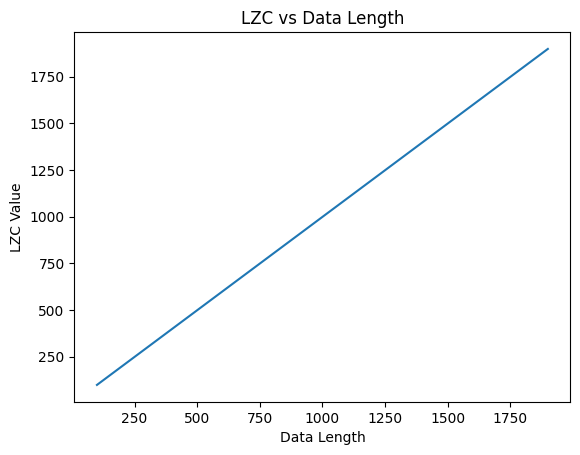

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lempel_ziv_complexity(binary_sequence):
    n = len(binary_sequence)
    c = 1  # Complexity measure
    for i in range(1, n):
        subsequence = binary_sequence[:i + 1]
        if subsequence not in binary_sequence[:i]:
            c += 1
    return c

def convert_to_binary_sequence(signal, threshold):
    binary_sequence = np.where(signal > threshold, 1, 0)
    return binary_sequence

def plot_lzc_vs_length(eeg_data):
    lengths = []
    lzc_values = []
    for length in range(100, len(eeg_data), 100):
        binary_sequence = convert_to_binary_sequence(eeg_data[:length], np.median(eeg_data))
        lzc = lempel_ziv_complexity(binary_sequence)
        lengths.append(length)
        lzc_values.append(lzc)

    plt.plot(lengths, lzc_values)
    plt.xlabel('Data Length')
    plt.ylabel('LZC Value')
    plt.title('LZC vs Data Length')
    plt.show()

# Example usage
eeg_data = np.random.rand(2000)  # Replace this with your EEG data
plot_lzc_vs_length(eeg_data)


In [ ]:
import numpy as np
import os

def lempel_ziv_complexity(binary_sequence):
    n = len(binary_sequence)
    c = 1  # Complexity measure
    for i in range(1, n):
        subsequence = binary_sequence[:i + 1]
        if subsequence not in binary_sequence[:i]:
            c += 1
    return c

def convert_to_binary_sequence(signal, threshold):
    binary_sequence = np.where(signal > threshold, 1, 0)
    return binary_sequence

def extract_lzc_feature(eeg_data):
    lzc_features = []
    for epoch in eeg_data:
        # Use the median as the threshold
        threshold = np.median(epoch)

        # Convert EEG signal to binary sequence
        binary_sequence = convert_to_binary_sequence(epoch, threshold)

        # Calculate Lempel-Ziv Complexity
        lzc = lempel_ziv_complexity(binary_sequence)

        lzc_features.append(lzc)

    return lzc_features

def process_csv_file(file_path):
    # Load EEG data from CSV
    eeg_data = np.genfromtxt(file_path, delimiter=',', skip_header=1)

    # Extract Lempel-Ziv Complexity features
    lzc_features = extract_lzc_feature(eeg_data)

    # Save features to a file
    features_file_path = os.path.splitext(file_path)[0] + '_lzc_features.txt'
    np.savetxt(features_file_path, lzc_features, fmt='%d')

    return features_file_path

# Example usage
csv_file_path = 'path/to/your/eeg_data.csv'  # Replace with your CSV file
feature_file_path = process_csv_file(csv_file_path)
print(f"LZC features saved to: {feature_file_path}")
